In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [6]:
data_dir=pathlib.Path('imagebase')

In [10]:
total=len(list(data_dir.glob("*/*.png")))
total

1200

In [11]:
small=list(data_dir.glob('Small/*'))
large=list(data_dir.glob('Large/*'))
medium=list(data_dir.glob('Medium/*'))
rejected=list(data_dir.glob('Rejected/*'))

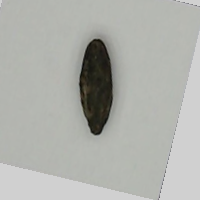

In [13]:
PIL.Image.open(str(small[299]))

## Read cocoa beans images from disk into numpy array using opencv

In [15]:
image_dict={
    'large': list(data_dir.glob('Large/*')),
    'medium': list(data_dir.glob('Medium/*')),
    'small': list(data_dir.glob('Small/*')),
    'rejected': list(data_dir.glob('Rejected/*')),
}

In [16]:
class_labels_dict={
    'rejected': 0,
    'small': 1,
    'medium': 2,
    'large': 3,
}

In [18]:
x,y=[],[]
for label,images in image_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized=cv2.resize(img,(200,200))
        x.append(resized)
        y.append(class_labels_dict[label])

In [19]:
X=np.array(x)
Y=np.array(y)

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=4)

In [24]:
len(X_train)

900

In [28]:
type(X_train)

numpy.ndarray

In [31]:
X_train.shape,y_train.shape

((900, 200, 200, 3), (900,))

In [32]:
X_test.shape,y_test.shape

((300, 200, 200, 3), (300,))

## Preprocessing: scale images

In [33]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [35]:
X_train_scaled.shape

(900, 200, 200, 3)

## Building model

In [45]:
num_classes = 4

model = Sequential([
    layers.Conv2D(16, 3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, strides=1, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=50) 

Epoch 1/50
29/29 [==============================] - 15s 456ms/step - loss: 1.6209 - accuracy: 0.2789
Epoch 2/50
29/29 [==============================] - 13s 455ms/step - loss: 1.2702 - accuracy: 0.3722
Epoch 3/50
29/29 [==============================] - 13s 457ms/step - loss: 1.2169 - accuracy: 0.4778
Epoch 4/50
29/29 [==============================] - 13s 460ms/step - loss: 1.0727 - accuracy: 0.5422
Epoch 5/50
29/29 [==============================] - 13s 458ms/step - loss: 0.8633 - accuracy: 0.6322
Epoch 6/50
29/29 [==============================] - 14s 469ms/step - loss: 0.8521 - accuracy: 0.6444
Epoch 7/50
29/29 [==============================] - 13s 450ms/step - loss: 0.7437 - accuracy: 0.6800
Epoch 8/50
29/29 [==============================] - 13s 437ms/step - loss: 0.6824 - accuracy: 0.7322
Epoch 9/50
29/29 [==============================] - 13s 453ms/step - loss: 0.8154 - accuracy: 0.7678
Epoch 10/50
29/29 [==============================] - 14s 476ms/step - loss: 0.5180 - accura

In [46]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 128)      

In [47]:
model.evaluate(X_test_scaled,y_test)

10/10 [==============================] - 1s 99ms/step - loss: 1.3067 - accuracy: 0.7800


[1.3067454099655151, 0.7799999713897705]